# 1.0 Load libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
concrete_data = pd.read_csv("concrete.csv") # read a cvs file that contains the dataset for a bank

In [3]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# 2.0 Univariate analysis (10 marks)

Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers (10 Marks)

## 2.1 Name and meaning

In [4]:
concrete_data.head() # To show a few rows of features and target data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
concrete_data.info() # To understand the data type and evaluate any missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


|Feature|Meaning|
|---|---|
|Cement (cement) |quantitative -- kg in a m3 mixture -- Input Variable|
|Blast Furnace Slag (slag)|quantitative -- kg in a m3 mixture -- Input Variable|
|Fly Ash (ash)|quantitative -- kg in a m3 mixture -- Input Variable|
|Water (water)|quantitative -- kg in a m3 mixture -- Input Variable| 
|Superplasticizer (superplastic)| quantitative -- kg in a m3 mixture -- Input Variable| 
|Coarse Aggregate (coarseagg)|quantitative -- kg in a m3 mixture -- Input Variabler| 
|Fine Aggregate (fineagg)|quantitative -- kg in a m3 mixture -- Input Variable |
|Age(age)|quantitative -- Day (1~365) -- Input Variable | 
|**Concrete compressive strength(strength)**|**quantitative -- MPa -- Output Variable**|


Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

## 2.2 Range of values observed for continuous variables

In [6]:
concrete_data.describe() # Statistic values of continuous variables

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
# This function is used to detect outliers in the dataset using standard of deviation
def detect_outliers(df, col): # There are a few methods to detect outliers (Z-sore, interquartile, or standard of deviation)
    upper_outliers = df[col].mean() + 3 * df[col].std()
    lower_outliers = df[col].mean() - 3 * df[col].std()
    upper_outliers = df[df[col] > upper_outliers] # Standard of deviation is used to detect outliers
    lower_outliers = df[df[col] < lower_outliers]
    total_outliers = upper_outliers[col].count() + upper_outliers[col].count()
    
    return f"Number of outliers = {total_outliers}"

for feature in concrete_data.columns: # Get all the column names of a data frame
    outlier_info = detect_outliers(concrete_data, feature) # Generate information for outliers
    print(f"median of {feature} = {np.median(concrete_data[feature])}, and mean of {feature} = {np.mean(concrete_data[feature])}, {outlier_info}")

median of cement = 272.9, and mean of cement = 281.1678640776698, Number of outliers = 0
median of slag = 22.0, and mean of slag = 73.89582524271844, Number of outliers = 8
median of ash = 0.0, and mean of ash = 54.188349514563086, Number of outliers = 0
median of water = 185.0, and mean of water = 181.56728155339798, Number of outliers = 4
median of superplastic = 6.4, and mean of superplastic = 6.204660194174756, Number of outliers = 20
median of coarseagg = 968.0, and mean of coarseagg = 972.918932038835, Number of outliers = 0
median of fineagg = 779.5, and mean of fineagg = 773.5804854368932, Number of outliers = 0
median of age = 28.0, and mean of age = 45.662135922330094, Number of outliers = 66
median of strength = 34.445, and mean of strength = 35.81796116504854, Number of outliers = 0


Features slag, superplastic and age have outliers. In particularly, slag and, ash and age have very large difference in terms of median and mean. 

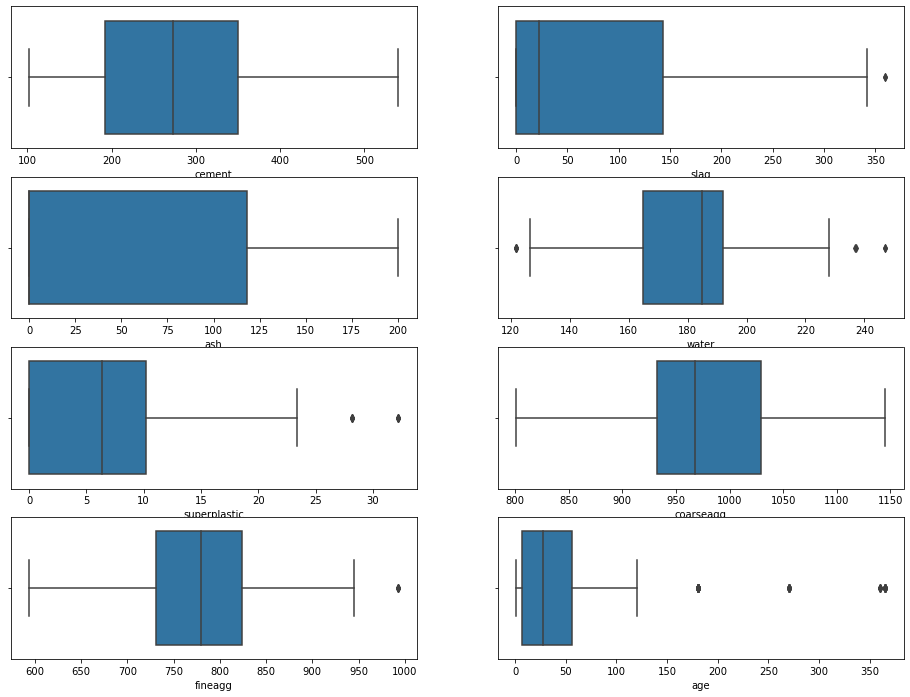

In [8]:
plt.figure(figsize=(16,12))

for index, column in enumerate(concrete_data.drop(columns = 'strength').columns):
    plt.subplot(4, 2, (index+1))
    sns.boxplot(concrete_data[column])

Features slag, superplastic and age have outliers. In particularly, slag, ash, superplastic and age have very large differences in terms of median and mean. 

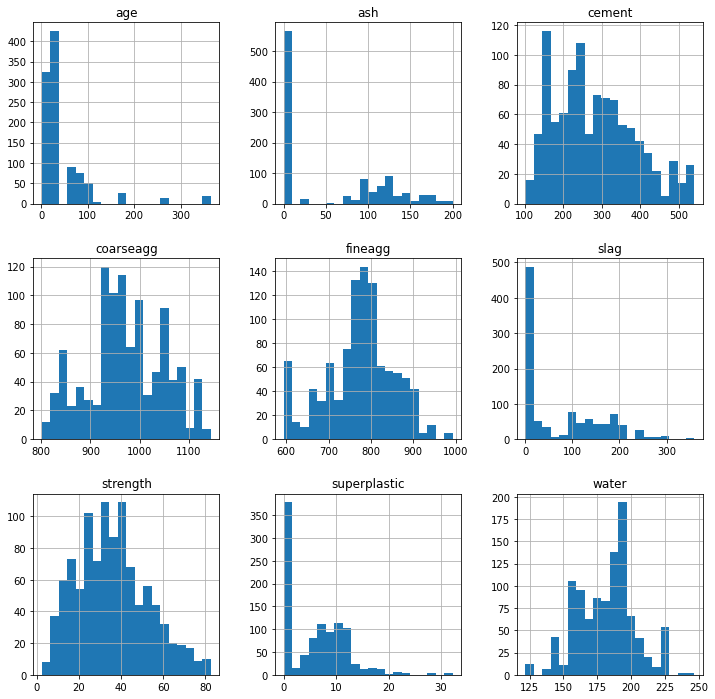

In [9]:
concrete_data.hist(stacked=False, bins=20, figsize=(12, 12)); 

# 3.0 Bi-variate analysis

## 3.1 Correlation Analysis

Figure below shows that the strength is correlated more strongly to cement, superplastic and age. However, there is no high correlation between different features. Ash is negatively correlated to cement and slag. Superplastic has some weak correlation with ash.

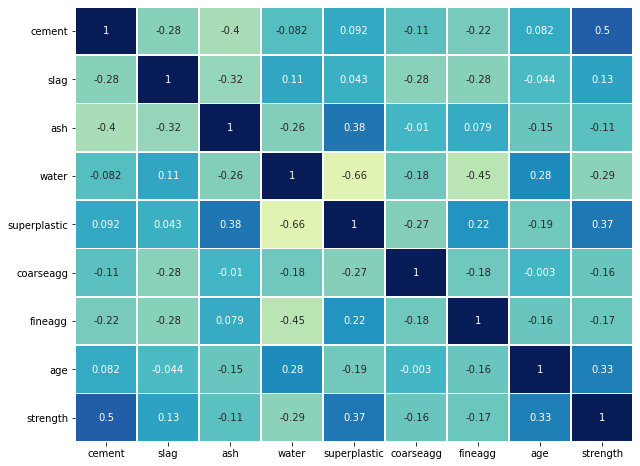

In [10]:
plt.figure(figsize=(10,8))

# Generate correlation matrix and show it using heat map
sns.heatmap(
    concrete_data.corr(),
    annot=True,
    linewidths=.5,
    center=0,
    cbar=False,
    cmap="YlGnBu"
)

plt.show()

In [22]:
concrete_data.corr(method='pearson').sort_values(by=['strength'], ascending=False)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633


In [21]:
concrete_data.corr(method='pearson')[['strength']].sort_values(by=['strength'], ascending=False)

,strength
strength,1.000000
cement,0.497832
superplastic,0.366079
age,0.328873
slag,0.134829
ash,-0.105755
coarseagg,-0.164935
fineagg,-0.167241
water,-0.289633


Figures above show that the strength is correlated more strongly to cement, superplastic and age. However, there is no high correlation between different features. Ash is negatively correlated to cement and slag. Superplastic has some weak correlation with ash.

## 3.2 Plot Chart

Figures below show that strength has positive correlation to cement, slag. However, superplastic has many outlier when strength values are amongh the highest. Water seems to negatively affect the strengh of the material.

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength', 'strength_bins'],
      dtype='object')


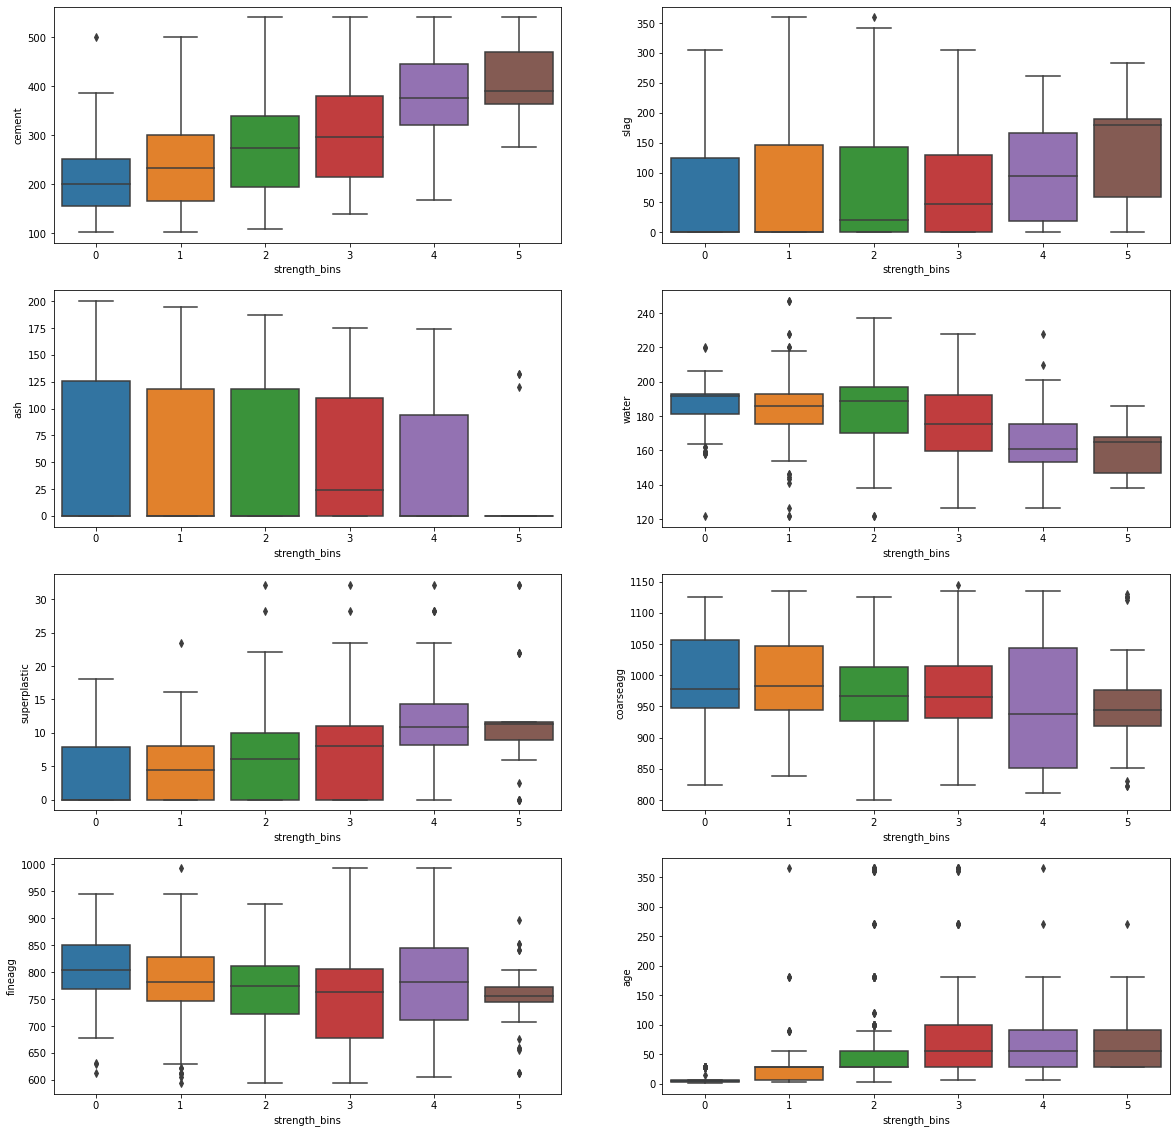

In [23]:
concrete_data_copy = concrete_data.copy(deep=True)

concrete_data_copy['strength_bins'] = pd.cut(concrete_data_copy.strength, bins=6, labels=False)

print(concrete_data_copy.columns)
plt.figure(figsize=(20,20))

for index, column in enumerate(concrete_data.drop(columns = 'strength').columns):
    plt.subplot(4, 2, (index+1))
    sns.boxplot(x="strength_bins", y=column, data=concrete_data_copy)

## 3.3 Plot Chart

Displot charts below show that cement and superplastic have distribution at higher value for higher strength bin. Water is a the reverse of cement and superplastic.

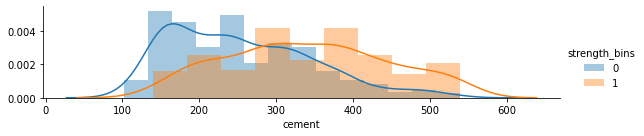

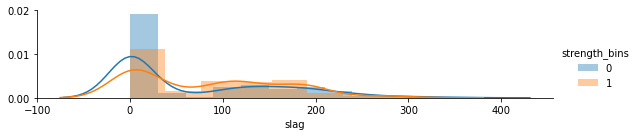

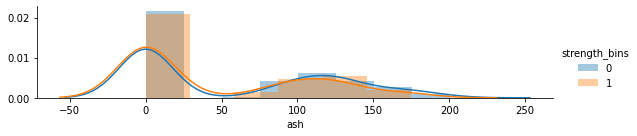

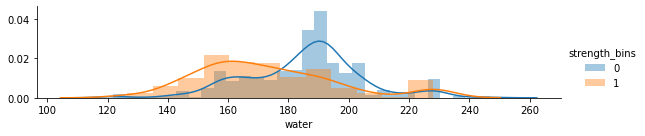

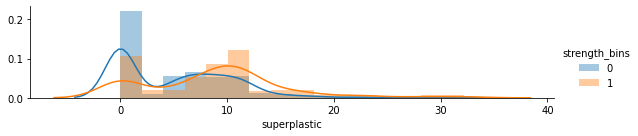

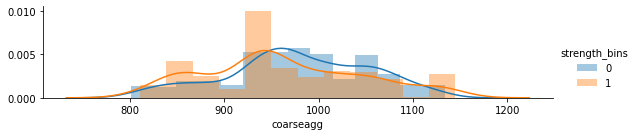

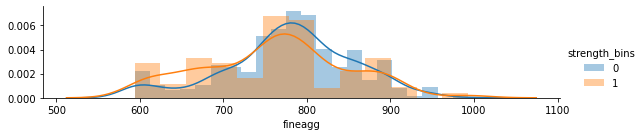

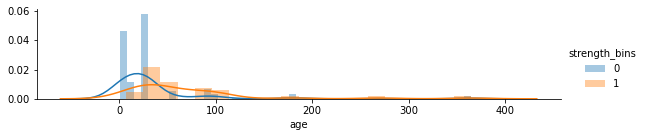

<Figure size 432x288 with 0 Axes>

In [24]:
concrete_data_copy = concrete_data.copy(deep=True)

concrete_data_copy['strength_bins'] = pd.cut(concrete_data_copy.strength, bins=2, labels=False)

# Generate chart for continuous independent variables and segregate by outcomes of the Target
for feature in concrete_data_copy.drop(columns=['strength_bins', 'strength']).columns:
    if "strength" not in feature:
        g = sns.FacetGrid(concrete_data_copy[[feature,"strength_bins"]], hue="strength_bins", height=2, aspect=4)
        g = (g.map(sns.distplot, feature, norm_hist=False).add_legend())
plt.figure()
plt.show()

# 4.0 Feature Engineering

## 4.1 Lasso 

We will use lasso to evaluate data of various features. Most of features have higher than 0.01 coefficient value after being fit to Lasso linear model, except coarseagg.       

In [28]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = concrete_data.loc[:, concrete_data.columns != 'strength'] # Obtain feature variables
y = concrete_data['strength'] # Obtain target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0) # Split the feature and target data to 70% train and 30% test data

for alpha in [0.1, 0.5, 1]:
    clf = linear_model.Lasso(alpha=alpha) # Use Lasso to evaluate whether we can drop certain features
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Evaluate the r2 score of the linear predictor
    print("alpha value is ", alpha)
    print("Train R2 score : {:.2f}". format(r2_score(y_train, y_train_pred))) 
    print("Test R2 score : {:.2f}". format(r2_score(y_test, y_test_pred))) 
    print(clf.coef_)
    
    print("---------------------")

alpha value is  0.1
Train R2 score : 0.62
Test R2 score : 0.58
[ 0.11219902  0.09092174  0.08064778 -0.1590895   0.38078001  0.01326024
  0.01432895  0.11838799]
---------------------
alpha value is  0.5
Train R2 score : 0.62
Test R2 score : 0.59
[ 0.11165641  0.09019968  0.08028231 -0.16578199  0.35531867  0.0118508
  0.01323714  0.11825345]
---------------------
alpha value is  1
Train R2 score : 0.62
Test R2 score : 0.59
[ 0.11098279  0.08930255  0.0798318  -0.1741285   0.32349991  0.01009362
  0.01187801  0.1180854 ]
---------------------


The r2 scores for train and test are below 0.63 for simple linear model. Therefore, we need to use more complex regression model such as Random Forest to predict strength of the material.

In [32]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = concrete_data.loc[:, concrete_data.columns != 'strength'] # Obtain feature variables
y = concrete_data['strength'] # Obtain target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0) # Split the feature and target data to 70% train and 30% test data

np.random.seed(0)

n_samples = 30
degrees = [1, 2, 3, 4]

# Evaluate a range of polynomials with different degrees
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    
    # Build a pipeline to fit train data to a polynomial and then to a linear regressor
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, y_train)

    # Evaluate the models using cross validation
    scores = cross_val_score(pipeline, X_train, y_train,
                             scoring="r2", cv=10)
    
    print("--------------------------")
    print("The polynomial is based on degree ", degrees[i])
    print(scores)

--------------------------
The polynomial is based on degree  1
[0.54186399 0.44250358 0.65278746 0.64724227 0.59660299 0.59462031
 0.67899316 0.7438839  0.66956998 0.47919432]
--------------------------
The polynomial is based on degree  2
[0.73342549 0.67000465 0.8323306  0.85117859 0.83997958 0.75575997
 0.81065023 0.78278934 0.77096463 0.76259185]
--------------------------
The polynomial is based on degree  3
[0.65639209 0.76265474 0.84276606 0.90021518 0.88664606 0.86215909
 0.42659135 0.7075509  0.53146432 0.87813159]
--------------------------
The polynomial is based on degree  4
[ -32437.80693937  -29520.1714519   -11383.93737961   -9742.95651239
  -26193.27884896   -2584.83222099   -5513.11444867  -86746.6796004
 -359574.15697747   -1812.60764238]


<Figure size 1008x360 with 0 Axes>

# 5.0 Kfold and Cross Validation

Algorithms that will be suitable for this project (one tree based and one bagging algorithm and one boosting algorithm). Use Kfold and Cross Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (15 marks)

## 5.1 Tree based Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model_performance = {}

num_folds = 5
kfold = KFold(n_splits=num_folds, random_state=2)
model = RandomForestRegressor()
results = cross_val_score(model, X, y, cv=kfold, scoring="r2")
print("R2 score is ", round(np.mean(results), 3))
d = {'name': ['Random forest'], 'r2 score': [round(np.mean(results), 3)]}
model_performance = pd.DataFrame(data=d)

R2 score is  0.911


Random Forest regressor based on tree based algorithm, shows reasonable R2 score exceeding 0.9 for the cross validation data. 

## 5.2 Bagging Regressor

In [51]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 5
kfold = KFold(n_splits=num_folds, random_state=2)
model = BaggingRegressor()
results = cross_val_score(model, X, y, cv=kfold, scoring="r2")

print("R2 score is ", round(np.mean(results), 3))
d = {'name': ['Bagging regressor'], 'r2 score': [round(np.mean(results), 3)]}
d = pd.DataFrame(data=d)

model_performance = pd.concat([model_performance, d])
model_performance.head()

R2 score is  0.9


,name,r2 score
0,Random forest,0.911
0,Bagging regressor,0.900


BaggingRegressor, a bagging regressor, shows reasonable R2 score still below 0.9 for the cross validation data. 

## 5.3 Boosting Regressor

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 5
kfold = KFold(n_splits=num_folds, random_state=2)
model = GradientBoostingRegressor()
results = cross_val_score(model, X, y, cv=kfold, scoring="r2")
print("R2 score is ", round(np.mean(results), 3))
d = {'name': ['Gradient Boosting regressor'], 'r2 score': [round(np.mean(results), 3)]}
d = pd.DataFrame(data=d)

model_performance = pd.concat([model_performance, d])
model_performance.head()

R2 score is  0.902


,name,r2 score
0,Random forest,0.911
0,Bagging regressor,0.900
0,Gradient Boosting regressor,0.902


Gradient Boosting regressor based on boosting algorithm, shows reasonable R2 score exceeding 0.9 for the cross validation data.

# 6.0 Grid and Random Search

It is important to break the data to train/cross validation data and test data. Consequently, a model can be trained on train/cv data and validation on the test data to evaluate bias and overfitting.

We will adopt Grid Search and Random Search to fine tune the model and avoid overfitting.

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

X = concrete_data.loc[:, concrete_data.columns != 'strength']
y = concrete_data['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

## 6.1 Tree based regressor

In [77]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

model_performance = pd.DataFrame(columns=['data type','search','name','estimator','r2 score'])

def grid_search_model(model_type, model_name, param_grid, model_performance):
    pipe_svc = Pipeline([('scl', StandardScaler()), (model_name, model_type)]) 
    grid = GridSearchCV(pipe_svc , param_grid = param_grid, cv = 5) 
    grid_fit = grid.fit(X_train, y_train) 
    y_train_pred = grid.predict(X_train)
    y_test_pred = grid.predict(X_test)
    
    print("Train R2 score : {:.3f}". format(r2_score(y_train, y_train_pred))) 
    print("Test R2 score : {:.3f}". format(r2_score(y_test, y_test_pred))) 
    
    d = {'data type': ['train'], 'search' : ['grid search'], 'name': [str(model_type)], 'estimator': [str(grid.best_params_)], 'r2 score': ["{:.3f}". format(r2_score(y_train, y_train_pred))]}
    d = pd.DataFrame(data=d)
    model_performance = pd.concat([model_performance, d])
    
    d = {'data type': ['test'], 'search' : ['grid search'], 'name': [str(model_type)], 'estimator': [str(grid.best_params_)], 'r2 score': ["{:.3f}". format(r2_score(y_test, y_test_pred))]}
    d = pd.DataFrame(data=d)
    model_performance = pd.concat([model_performance, d])
    print("-------- End Grid search --------")
    
    return model_performance
    
def random_search_model(model_type, model_name, distributions, model_performance):
    pipe_svc = Pipeline([('scl', StandardScaler()), (model_name, model_type)]) 
    grid = RandomizedSearchCV(pipe_svc , distributions, cv = 5) 
    grid_fit = grid.fit(X_train, y_train) 
    y_train_pred = grid.predict(X_train)
    y_test_pred = grid.predict(X_test)
    
    print("Train R2 score : {:.3f}". format(r2_score(y_train, y_train_pred))) 
    print("Test R2 score : {:.3f}". format(r2_score(y_test, y_test_pred))) 
    
    d = {'data type': ['train'], 'search' : ['random search'], 'name': [str(model_type)], 'estimator': [str(grid.best_params_)], 'r2 score': ["{:.3f}". format(r2_score(y_train, y_train_pred))]}
    d = pd.DataFrame(data=d)
    model_performance = pd.concat([model_performance, d])
    
    d = {'data type': ['test'], 'search' : ['random search'], 'name': [str(model_type)], 'estimator': [str(grid.best_params_)], 'r2 score': ["{:.3f}". format(r2_score(y_test, y_test_pred))]}
    d = pd.DataFrame(data=d)
    model_performance = pd.concat([model_performance, d])
    
    return model_performance

param_grid = {'rf__max_depth': [6, 8, 10], 'rf__bootstrap':[True,False], 'rf__ccp_alpha':[0, 1, 2]} 
model_performance = grid_search_model(RandomForestRegressor(), 'rf', param_grid, model_performance)
param_grid = {'rf__max_depth': [6, 10], 'rf__bootstrap':[True,False], 'rf__ccp_alpha':[0, 2]} 
model_performance = random_search_model(RandomForestRegressor(), 'rf', param_grid, model_performance)

model_performance.head()

Train R2 score : 0.979
Test R2 score : 0.897
-------- End Grid search --------
Train R2 score : 0.979
Test R2 score : 0.894


,data type,search,name,estimator,r2 score
0,train,grid search,"RandomForestRegressor(bootstrap=True, ccp_alph...","{'rf__bootstrap': True, 'rf__ccp_alpha': 0, 'r...",0.98
0,test,grid search,"RandomForestRegressor(bootstrap=True, ccp_alph...","{'rf__bootstrap': True, 'rf__ccp_alpha': 0, 'r...",0.90
0,train,random search,"RandomForestRegressor(bootstrap=True, ccp_alph...","{'rf__max_depth': 10, 'rf__ccp_alpha': 0, 'rf_...",0.98
0,test,random search,"RandomForestRegressor(bootstrap=True, ccp_alph...","{'rf__max_depth': 10, 'rf__ccp_alpha': 0, 'rf_...",0.89


Random Forest regressor based on tree based algorithm, shows good R2 score of 0.89 for the test data. However, grid search seems to perform slightly better than random search. Depending on the priority about training time or score accuracy, grid search is preferred if accuracy performance is most important.

In [70]:
model_performance['estimator']

0                                                    -
0    {'rf__bootstrap': True, 'rf__ccp_alpha': 0, 'r...
0    {'rf__bootstrap': True, 'rf__ccp_alpha': 0, 'r...
0    {'rf__max_depth': 9, 'rf__ccp_alpha': 0, 'rf__...
0    {'rf__max_depth': 9, 'rf__ccp_alpha': 0, 'rf__...
Name: estimator, dtype: object

## 6.2 Bagging regressor

In [81]:
BaggingRegressor?

In [82]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

param_grid = {'rf__base_estimator': [None, SVR()], 'rf__bootstrap_features': [True, False]} 
model_performance = grid_search_model(BaggingRegressor(), 'rf', param_grid, model_performance)

param_grid = {'rf__base_estimator': [None, SVR()], 'rf__bootstrap_features': [True, False]} 
model_performance = random_search_model(BaggingRegressor(), 'rf', param_grid, model_performance)

model_performance

Train R2 score : 0.973
Test R2 score : 0.895
-------- End Grid search --------
Train R2 score : 0.978
Test R2 score : 0.891


,data type,search,name,estimator,r2 score
0,train,grid search,"RandomForestRegressor(bootstrap=True, ccp_alph...","{'rf__bootstrap': True, 'rf__ccp_alpha': 0, 'r...",0.98
0,test,grid search,"RandomForestRegressor(bootstrap=True, ccp_alph...","{'rf__bootstrap': True, 'rf__ccp_alpha': 0, 'r...",0.90
0,train,random search,"RandomForestRegressor(bootstrap=True, ccp_alph...","{'rf__max_depth': 10, 'rf__ccp_alpha': 0, 'rf_...",0.98
0,test,random search,"RandomForestRegressor(bootstrap=True, ccp_alph...","{'rf__max_depth': 10, 'rf__ccp_alpha': 0, 'rf_...",0.89
0,train,grid search,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...","{'rf__learning_rate': 0.1, 'rf__n_estimators':...",0.94
0,test,grid search,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...","{'rf__learning_rate': 0.1, 'rf__n_estimators':...",0.89
0,train,grid search,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...","{'rf__learning_rate': 0.1, 'rf__n_estimators':...",0.94
0,test,grid search,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...","{'rf__learning_rate': 0.1, 'rf__n_estimators':...",0.89
0,train,random search,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...","{'rf__kernel': 'linear', 'rf__gamma': 'scale',...",0.59
0,test,random search,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...","{'rf__kernel': 'linear', 'rf__gamma': 'scale',...",0.52


Bagging regressor based on bagging based algorithm, shows good R2 score of 0.89 for the test data. However, grid search seems to perform slightly better than random search. Depending on the priority about training time or score accuracy, grid search is preferred if accuracy performance is most important.

## 6.3 Boosting Regressor

In [79]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {'rf__n_estimators': [20, 50, 80], 'rf__learning_rate': [0.1, 1, 100]} 
model_performance = grid_search_model(GradientBoostingRegressor(), 'rf', param_grid, model_performance)

model_performance

Train R2 score : 0.941
Test R2 score : 0.891
-------- End Grid search --------


,data type,search,name,estimator,r2 score
0,train,grid search,"RandomForestRegressor(bootstrap=True, ccp_alph...","{'rf__bootstrap': True, 'rf__ccp_alpha': 0, 'r...",0.98
0,test,grid search,"RandomForestRegressor(bootstrap=True, ccp_alph...","{'rf__bootstrap': True, 'rf__ccp_alpha': 0, 'r...",0.90
0,train,random search,"RandomForestRegressor(bootstrap=True, ccp_alph...","{'rf__max_depth': 10, 'rf__ccp_alpha': 0, 'rf_...",0.98
0,test,random search,"RandomForestRegressor(bootstrap=True, ccp_alph...","{'rf__max_depth': 10, 'rf__ccp_alpha': 0, 'rf_...",0.89
0,train,grid search,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...","{'rf__learning_rate': 0.1, 'rf__n_estimators':...",0.94
0,test,grid search,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...","{'rf__learning_rate': 0.1, 'rf__n_estimators':...",0.89
0,train,grid search,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...","{'rf__learning_rate': 0.1, 'rf__n_estimators':...",0.94
0,test,grid search,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...","{'rf__learning_rate': 0.1, 'rf__n_estimators':...",0.89


In [80]:
from sklearn.svm import SVR

param_grid = {'rf__gamma': ['scale', 'auto'], 'rf__C': [0, 1], 'rf__kernel': ['linear', 'precomputed']} 
model_performance = random_search_model(SVR(), 'rf', param_grid, model_performance)

model_performance

Train R2 score : 0.593
Test R2 score : 0.523


,data type,search,name,estimator,r2 score
0,train,grid search,"RandomForestRegressor(bootstrap=True, ccp_alph...","{'rf__bootstrap': True, 'rf__ccp_alpha': 0, 'r...",0.98
0,test,grid search,"RandomForestRegressor(bootstrap=True, ccp_alph...","{'rf__bootstrap': True, 'rf__ccp_alpha': 0, 'r...",0.90
0,train,random search,"RandomForestRegressor(bootstrap=True, ccp_alph...","{'rf__max_depth': 10, 'rf__ccp_alpha': 0, 'rf_...",0.98
0,test,random search,"RandomForestRegressor(bootstrap=True, ccp_alph...","{'rf__max_depth': 10, 'rf__ccp_alpha': 0, 'rf_...",0.89
0,train,grid search,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...","{'rf__learning_rate': 0.1, 'rf__n_estimators':...",0.94
0,test,grid search,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...","{'rf__learning_rate': 0.1, 'rf__n_estimators':...",0.89
0,train,grid search,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...","{'rf__learning_rate': 0.1, 'rf__n_estimators':...",0.94
0,test,grid search,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...","{'rf__learning_rate': 0.1, 'rf__n_estimators':...",0.89
0,train,random search,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...","{'rf__kernel': 'linear', 'rf__gamma': 'scale',...",0.59
0,test,random search,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...","{'rf__kernel': 'linear', 'rf__gamma': 'scale',...",0.52


Gradient Boosting Regressor based on boosting based algorithm, shows good R2 score of 0.89 for the test data. However, grid search seems to perform slightly better than random search. Depending on the priority about training time or score accuracy, grid search is preferred if accuracy performance is most important.

## 7.0 Evaluate best performing model

Based on a list of r2 scores generated by various models, Random Forest that uses Grid Search method perform the best compared to other models. However, the the differences between Random Forest, Gradient Boosting, and Bagging are not significant.

In [86]:
model_performance[(model_performance['data type']=='test')].sort_values(by=['r2 score'], ascending=False)

,data type,search,name,estimator,r2 score
0,test,grid search,"RandomForestRegressor(bootstrap=True, ccp_alph...","{'rf__bootstrap': True, 'rf__ccp_alpha': 0, 'r...",0.90
0,test,random search,"RandomForestRegressor(bootstrap=True, ccp_alph...","{'rf__max_depth': 10, 'rf__ccp_alpha': 0, 'rf_...",0.89
0,test,grid search,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...","{'rf__learning_rate': 0.1, 'rf__n_estimators':...",0.89
0,test,grid search,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...","{'rf__learning_rate': 0.1, 'rf__n_estimators':...",0.89
0,test,grid search,"BaggingRegressor(base_estimator=None, bootstra...","{'rf__base_estimator': None, 'rf__bootstrap_fe...",0.89
0,test,random search,"BaggingRegressor(base_estimator=None, bootstra...","{'rf__bootstrap_features': False, 'rf__base_es...",0.89
0,test,random search,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...","{'rf__kernel': 'linear', 'rf__gamma': 'scale',...",0.52


Based on a list of r2 scores generated by various models, Random Forest has the highest difference between train vs test r2 score, which means the highest overfitting compared to other models. Gradient Boosting has the least difference between train and test r2 score, which indicating the least overfitting compared to other models.

In [88]:
model_performance[(model_performance['data type']=='train')].sort_values(by=['r2 score'], ascending=False)

,data type,search,name,estimator,r2 score
0,train,grid search,"RandomForestRegressor(bootstrap=True, ccp_alph...","{'rf__bootstrap': True, 'rf__ccp_alpha': 0, 'r...",0.98
0,train,random search,"RandomForestRegressor(bootstrap=True, ccp_alph...","{'rf__max_depth': 10, 'rf__ccp_alpha': 0, 'rf_...",0.98
0,train,random search,"BaggingRegressor(base_estimator=None, bootstra...","{'rf__bootstrap_features': False, 'rf__base_es...",0.98
0,train,grid search,"BaggingRegressor(base_estimator=None, bootstra...","{'rf__base_estimator': None, 'rf__bootstrap_fe...",0.97
0,train,grid search,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...","{'rf__learning_rate': 0.1, 'rf__n_estimators':...",0.94
0,train,grid search,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...","{'rf__learning_rate': 0.1, 'rf__n_estimators':...",0.94
0,train,random search,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...","{'rf__kernel': 'linear', 'rf__gamma': 'scale',...",0.59


# 8.0 Further Fine Tuning

After observing some outlier numbers in the features, it could be a good idea to try to use log function to reduce distances of the values of the features. <br>

However, we don't observe significant improvement in r2 value after trans

In [90]:
def transform_data(df, features_to_remove_outlier):
    for feature in features_to_remove_outlier:
        if df[feature].dtype == 'int64': # Look for integer data series
            if np.min(df[feature])>0:
                print(feature)
                df[feature] = np.log1p(df[feature])
                
    return df

concrete_data_log = concrete_data.copy(deep=True)
for feature in concrete_data_log.columns:
    concrete_data_log[feature] = np.log1p(concrete_data_log[feature])

In [91]:
from sklearn.model_selection import train_test_split

X = concrete_data_log.loc[:, concrete_data_log.columns != 'strength']
y = concrete_data_log['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=0)


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

def grid_search_model(model_type, model_name, param_grid):
    pipe_svc = Pipeline([('scl', StandardScaler()), (model_name, model_type)]) 
    grid = GridSearchCV(pipe_svc , param_grid = param_grid, cv = 5) 
    grid_fit = grid.fit(X_train, y_train) 
    y_train_pred = grid.predict(X_train)
    y_test_pred = grid.predict(X_test)
    
    print("Train R2 score : {:.2f}". format(r2_score(y_train, y_train_pred))) 
    print("Test R2 score : {:.2f}". format(r2_score(y_test, y_test_pred))) 
    
    print("-------- End Grid search --------")
    
def random_search_model(model_type, model_name, distributions):
    pipe_svc = Pipeline([('scl', StandardScaler()), (model_name, model_type)]) 
    grid = RandomizedSearchCV(pipe_svc , distributions, cv = 5) 
    grid_fit = grid.fit(X_train, y_train) 
    y_train_pred = grid.predict(X_train)
    y_test_pred = grid.predict(X_test)
    
    print("Train R2 score : {:.2f}". format(r2_score(y_train, y_train_pred))) 
    print("Test R2 score : {:.2f}". format(r2_score(y_test, y_test_pred))) 
                
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'rf__max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'rf__bootstrap':[True,False], 'rf__ccp_alpha':[0, 1, 2]} 
grid_search_model(RandomForestRegressor(), 'rf', param_grid)
param_grid = {'rf__max_depth': [3, 10], 'rf__bootstrap':[True,False], 'rf__ccp_alpha':[0, 1, 2]} 
random_search_model(RandomForestRegressor(), 'rf', param_grid)

Train R2 score : 0.98
Test R2 score : 0.89
-------- End Grid search --------
Train R2 score : 0.98
Test R2 score : 0.89
